In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')   

Unnamed: 0            0
fog_train.year        0
fog_train.month       0
fog_train.day         0
fog_train.time        0
fog_train.minute      0
fog_train.stn_id      0
fog_train.ws10_deg    0
fog_train.ws10_ms     0
fog_train.ta          0
fog_train.re          0
fog_train.hm          0
fog_train.sun10       0
fog_train.ts          0
fog_train.vis1        0
fog_train.class       0
dtype: int64


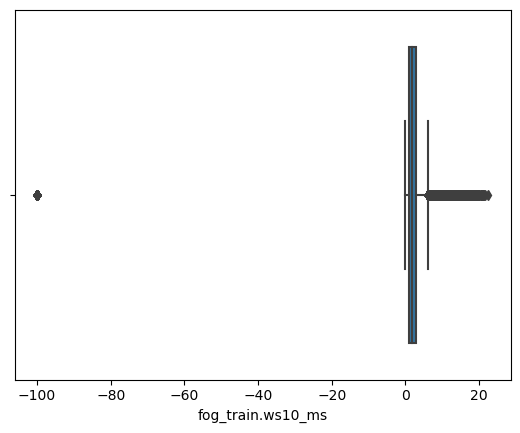

In [3]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('Data//train_data.csv')

# 결측치 확인
print(data.isnull().sum())

# datetime 형식 변환
# data['datetime'] = pd.to_datetime(data[['fog_train.year', 'fog_train.month', 'fog_train.day', 'fog_train.time', 'fog_train.minute']])
# data.drop(columns=['fog_train.year', 'fog_train.month', 'fog_train.day', 'fog_train.time', 'fog_train.minute'], inplace=True)
# 일단 날짜 관련 값도 이란 지우지 말고 한번 보기 

# 이상치 확인 및 처리
# 예를 들어, 시각적으로 이상치를 확인하고 처리
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['fog_train.ws10_ms'])
plt.show()

# 이상치 제거 또는 대체
# data = data[data['fog_train.ws10_ms'] < 특정값]


         Unnamed: 0  fog_train.month  fog_train.day  fog_train.time  \
count  3.156459e+06     3.156459e+06   3.156459e+06    3.156459e+06   
mean   1.578230e+06     6.521931e+00   1.573276e+01    1.150007e+01   
std    9.111914e+05     3.448969e+00   8.801320e+00    6.922149e+00   
min    1.000000e+00     1.000000e+00   1.000000e+00    0.000000e+00   
25%    7.891155e+05     4.000000e+00   8.000000e+00    6.000000e+00   
50%    1.578230e+06     7.000000e+00   1.600000e+01    1.200000e+01   
75%    2.367344e+06     1.000000e+01   2.300000e+01    1.800000e+01   
max    3.156459e+06     1.200000e+01   3.100000e+01    2.300000e+01   

       fog_train.minute  fog_train.ws10_deg  fog_train.ws10_ms  fog_train.ta  \
count      3.156459e+06        3.156459e+06       3.156459e+06  3.156459e+06   
mean       2.500016e+01        1.852152e+02       1.999417e+00  1.328812e+01   
std        1.707819e+01        1.072184e+02       4.721616e+00  1.100537e+01   
min        0.000000e+00       -9.990000e

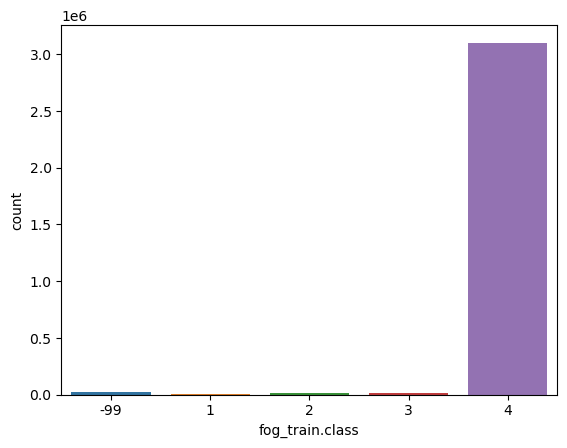

KeyboardInterrupt: 

In [4]:

## 2. 탐색적 데이터 분석 (EDA)
# EDA를 통해 각 변수와 타겟 변수(fog_train.class) 간의 관계를 파악합니다. 시각화를 통해 변수의 분포와 상관관계를 확인합니다.

# 기본 통계량 확인
print(data.describe())

# 타겟 변수 분포 확인
sns.countplot(x='fog_train.class', data=data)
plt.show()

# 각 변수와 타겟 변수 간의 관계 확인
sns.pairplot(data, hue='fog_train.class')
plt.show()

# 상관계수 행렬
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
# 3. 특징 선택 및 엔지니어링
# 특징 선택: 상관계수, 피처 중요도 등을 통해 중요한 특징을 선택합니다.
# 특징 엔지니어링: 날짜 및 시간 데이터를 통해 새로운 특징을 생성하거나, 파생 변수를 추가합니다.
from sklearn.feature_selection import SelectKBest, f_classif

# 특징 선택
X = data.drop(columns=['fog_train.class'])
y = data['fog_train.class']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

# 중요 특징 출력
for feature, score in zip(X.columns, scores):
    print(f"Feature: {feature}, Score: {score}")

# 예시: 새로운 특징 생성
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data.drop(columns=['datetime'], inplace=True)



# 순서
위는 전처리에 관련된 것
아래는 모델의 평가에 관한 것들이다.

In [ ]:

# 데이터 불러오기
data = pd.read_csv('train_data.csv')

# datetime 형식 변환
data['datetime'] = pd.to_datetime(data[['fog_train.year', 'fog_train.month', 'fog_train.day', 'fog_train.time', 'fog_train.minute']])
data.drop(columns=['fog_train.year', 'fog_train.month', 'fog_train.day', 'fog_train.time', 'fog_train.minute'], inplace=True)

# 새로운 특징 생성
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data.drop(columns=['datetime'], inplace=True)

# X, y 분리
X = data.drop(columns=['fog_train.class'])
y = data['fog_train.class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 정의
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 교차 검증 및 성능 평가
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    model.fit(X_train, y_train)

# 최종 모델 학습 및 예측
log_reg = models["Logistic Regression"]
svm = models["SVM"]
rf = models["Random Forest"]
xgb = models["XGBoost"]

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 결과 비교 함수 정의
def evaluate_model(y_test, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 모델 결과 평가
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
